In [1]:
import h5py
import math
import numpy as np
import seaborn as sns
import statsmodels.stats.weightstats as ws
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import CompareMeans

In [2]:
hf = h5py.File("BigSave/sf3.jld2", 'r')

In [3]:
data = hf.get('data')[()]

In [12]:
cut = 78
total_ratio = 0.01
for i, v in enumerate(["avGFP_brt", "avGFPs_em", "avGFPs_ex", "avGFPs_brt"]):
    c = CompareMeans(ws.DescrStatsW(data[i][:cut]), ws.DescrStatsW(data[i][:math.floor(total_ratio * len(data[i]))]))
    print("Dataset : %s" %v)
    print(np.std(c.d2.data))
    print("Avg. %d / %d : %.4f / %.4f" %(len(c.d1.data), len(c.d2.data), np.mean(c.d1.data), np.mean(c.d2.data)))
    print("Z-value : %.2f\np-value : %.3e\n" %(c.ztest_ind(alternative="larger", usevar="unequal")))

Dataset : avGFP_brt
0.08596835154884085
Avg. 78 / 1598 : 0.6520 / 0.6044
Z-value : 15.17
p-value : 2.856e-52

Dataset : avGFPs_em
0.09036284232846409
Avg. 78 / 1598 : 0.7177 / 0.6390
Z-value : 11.54
p-value : 4.261e-31

Dataset : avGFPs_ex
0.03026889719936659
Avg. 78 / 1598 : 0.8593 / 0.8357
Z-value : 7.59
p-value : 1.605e-14

Dataset : avGFPs_brt
0.03523443482805773
Avg. 78 / 1598 : 0.4028 / 0.3658
Z-value : 10.97
p-value : 2.604e-28



PCC : -0.1616


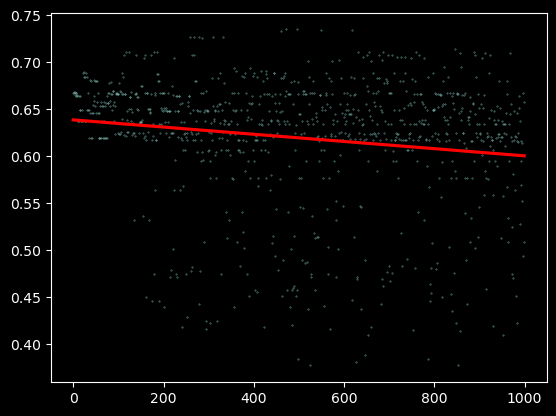

PCC : -0.2195


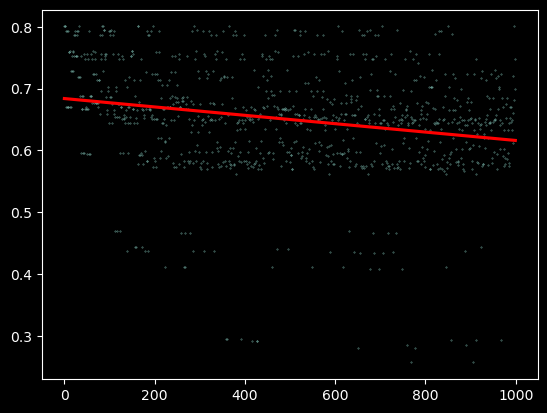

PCC : -0.1878


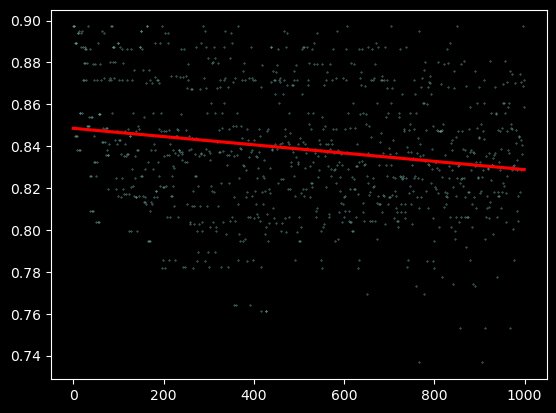

PCC : -0.2472


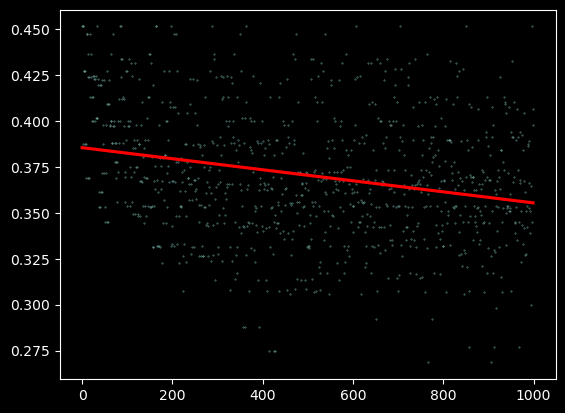

In [5]:
ratio = 0.01
for d in data:
    cut = math.floor(ratio * len(d))
    cut = 1000
    plot_data = d[:cut]
    x, y = list(range(len(plot_data))), plot_data
    sns.regplot(x=x, y=y, ci=None, scatter_kws={'s':0.1}, line_kws={"color": "red"})
    print("PCC : %.4f" %np.corrcoef(x, y)[0, 1])
    plt.show()